<p style="text-align: center; background-color: #FFF1DB; padding: 20px">
    <img src="logow-removebg-preview.png"></img> </br></br>
    <img src="project.png"></img>
</p>

# Online Retail Project

This notebook provides a structured approach to handling data cleaning, exploratory data analysis (EDA), and data visualization tasks using the provided Online Retail dataset.

Each step will cover various aspects of cleaning, analyzing, and visualizing the dataset.


## Step 1: Import Libraries, Loading the Dataset and Initial Exploration

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats

# conda install missingno
# pip install --upgrade missingno
import missingno as msno

import plotly.express as px

# conda install folium
import folium
from folium import plugins

# conda install wordcloud
from wordcloud import WordCloud

# conda config --add channels conda-forge
# conda install conda-forge::sweetviz
import sweetviz as sv

# conda install -c conda-forge ydata-profiling
from ydata_profiling import ProfileReport

plt.rcParams["figure.figsize"] = (6,4)

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset 
# Display first few rows
# Check the structure of the dataset.
# Inspect the data types and missing values using df.info()
# Get basic statistics for numerical columns with df.describe()
# and more..

### Load the dataset 

In [2]:
# Read the CSV file
data = pd.read_csv('online_retail_dataset.csv')
df0 = pd.DataFrame(data)

In [3]:
# Copying the dataframe for backup
df = df0.copy()

### Check the structure of the dataset

In [4]:
# Size of the data
df.size

846294

In [5]:
# Shape of the data
df.shape

(49782, 17)

### Inspect the data types and missing values using `df.info()`

In [6]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

1. The dataset contains 17 columns (fields).
2. There are 49782 entries (rows) in the dataset.
3. The columns are:
    - InvoiceNo
    - StockCode
    - Description
    - Quantity
    - InvoiceDate
    - UnitPrice
    - CustomerID
    - Country
    - Discount
    - PaymentMethod
    - ShippingCost
    - Category
    - SalesChannel
    - ReturnStatus
    - ShipmentProvider
    - WarehouseLocation
    - OrderPriority
4. There are indeed NULL values in the "CustomerID", "ShippingCost", and "WarehouseLocation" fields. This is evident from the "non-null" count being less than the total number of entries for these columns.
5. The data types of the columns vary:
    - Object (string) types for text fields like Description, Country, etc.
    - Float64 for numeric fields like UnitPrice, Discount, ShippingCost
    - Int64 for Quantity
    - CustomerID is likely float64 due to the presence of NULL values

### Display first few rows

In [7]:
# First 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


In [8]:
# Last 5 rows
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00,70.92,51445.0,Spain,0.20,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00,51.74,28879.0,United States,0.23,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00,85.25,21825.0,Portugal,0.20,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00,39.64,43199.0,United Kingdom,0.31,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium
49781,772215,SKU_1832,White Mug,30,2025-09-05 05:00,38.27,53328.0,France,0.10,Credit Card,9.13,Stationery,Online,Not Returned,UPS,Rome,Low


In [9]:
# Random rows
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
42413,794694,SKU_1408,Notebook,18,2024-11-02 05:00,58.35,17377.0,Australia,0.33,Credit Card,21.24,Accessories,In-store,Returned,FedEx,Paris,Low
21070,756023,SKU_1436,Wall Clock,42,2022-05-27 22:00,92.86,81401.0,Netherlands,0.11,Credit Card,14.14,Electronics,Online,Not Returned,DHL,Amsterdam,Low
46598,371592,SKU_1117,Wireless Mouse,24,2025-04-25 14:00,13.21,26577.0,Norway,0.14,Bank Transfer,9.78,Electronics,Online,Not Returned,UPS,Rome,High
17881,779648,SKU_1370,Notebook,33,2022-01-15 01:00,18.62,82340.0,Germany,0.42,paypall,9.54,Stationery,Online,Not Returned,Royal Mail,Berlin,Low
18368,282075,SKU_1891,Desk Lamp,7,2022-02-04 08:00,28.07,49932.0,Australia,0.33,Credit Card,20.32,Furniture,Online,Not Returned,Royal Mail,Rome,Medium


### Get basic statistics for numerical columns with `df.describe()`

In [10]:
# Description for numerics
df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Discount,ShippingCost
count,49782.000000,49782.000000,49782.000000,44804.000000,49782.000000,47293.000000
mean,550681.239946,22.372343,47.537862,55032.871775,0.275748,17.494529
std,260703.009944,17.917774,33.479510,25913.660157,0.230077,7.220557
min,100005.000000,-50.000000,-99.980000,10001.000000,0.000000,5.000000
25%,324543.000000,11.000000,23.592500,32750.750000,0.130000,11.220000
50%,552244.000000,23.000000,48.920000,55165.000000,0.260000,17.500000
75%,776364.000000,37.000000,74.610000,77306.250000,0.380000,23.720000
max,999997.000000,49.000000,100.000000,99998.000000,1.999764,30.000000


In [11]:
# Description for non numerics
df.select_dtypes(include=['object']).describe()

,StockCode,Description,InvoiceDate,Country,PaymentMethod,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
count,49782,49782,49782,49782,49782,49782,49782,49782,49782,46297,49782
unique,1000,11,49782,12,3,5,2,2,4,5,3
top,SKU_1761,Wall Clock,2020-01-01 00:00,France,Bank Transfer,Furniture,Online,Not Returned,FedEx,Amsterdam,Medium
freq,76,4617,1,4230,16747,10084,25051,44888,12501,9458,16678


### Data

In [12]:
# Field names
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Discount', 'PaymentMethod',
       'ShippingCost', 'Category', 'SalesChannel', 'ReturnStatus',
       'ShipmentProvider', 'WarehouseLocation', 'OrderPriority'],
      dtype='object')

In [13]:
# Data types
df.dtypes

InvoiceNo              int64
StockCode             object
Description           object
Quantity               int64
InvoiceDate           object
UnitPrice            float64
CustomerID           float64
Country               object
Discount             float64
PaymentMethod         object
ShippingCost         float64
Category              object
SalesChannel          object
ReturnStatus          object
ShipmentProvider      object
WarehouseLocation     object
OrderPriority         object
dtype: object

In [14]:
# Converting data type from string to datetime for InvoiceDate 
df = df.astype({'InvoiceDate': 'datetime64[s]'})
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00:00,70.92,51445.0,Spain,0.200000,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00:00,51.74,28879.0,United States,0.230000,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00:00,85.25,21825.0,Portugal,0.200000,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00:00,39.64,43199.0,United Kingdom,0.310000,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium


In [15]:
# Cleaning decimal values from CustomerID 
df['CustomerID'] = pd.to_numeric(df['CustomerID'], errors='coerce').astype('Int64')
df

# errors='coerce': This parameter ensures that values that cannot be converted are treated as NaN (Not a Number). In other words, any value that cannot be converted to a number will become NaN.
# .astype('Int64'): This method converts the transformed values to 64-bit integer type. The 'Int64' type is a special data type in Pandas that represents integers that can contain NaN values.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00:00,1.71,37039,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00:00,41.25,19144,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00:00,29.11,50472,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00:00,76.68,96586,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00:00,-68.11,<NA>,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00:00,70.92,51445,Spain,0.200000,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00:00,51.74,28879,United States,0.230000,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00:00,85.25,21825,Portugal,0.200000,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00:00,39.64,43199,United Kingdom,0.310000,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium


In [16]:
df.dtypes

InvoiceNo                    int64
StockCode                   object
Description                 object
Quantity                     int64
InvoiceDate          datetime64[s]
UnitPrice                  float64
CustomerID                   Int64
Country                     object
Discount                   float64
PaymentMethod               object
ShippingCost               float64
Category                    object
SalesChannel                object
ReturnStatus                object
ShipmentProvider            object
WarehouseLocation           object
OrderPriority               object
dtype: object

In [17]:
df.describe(include = 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
count,49782.000000,49782,49782,49782.000000,49782,49782.000000,44804.0,49782,49782.000000,49782,47293.000000,49782,49782,49782,49782,46297,49782
unique,NaN,1000,11,NaN,NaN,NaN,<NA>,12,NaN,3,NaN,5,2,2,4,5,3
top,NaN,SKU_1761,Wall Clock,NaN,NaN,NaN,<NA>,France,NaN,Bank Transfer,NaN,Furniture,Online,Not Returned,FedEx,Amsterdam,Medium
freq,NaN,76,4617,NaN,NaN,NaN,<NA>,4230,NaN,16747,NaN,10084,25051,44888,12501,9458,16678
mean,550681.239946,NaN,NaN,22.372343,2022-11-03 02:30:00,47.537862,55032.871775,NaN,0.275748,NaN,17.494529,NaN,NaN,NaN,NaN,NaN,NaN
min,100005.000000,NaN,NaN,-50.000000,2020-01-01 00:00:00,-99.980000,10001.0,NaN,0.000000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,324543.000000,NaN,NaN,11.000000,2021-06-02 13:15:00,23.592500,32750.75,NaN,0.130000,NaN,11.220000,NaN,NaN,NaN,NaN,NaN,NaN
50%,552244.000000,NaN,NaN,23.000000,2022-11-03 02:30:00,48.920000,55165.0,NaN,0.260000,NaN,17.500000,NaN,NaN,NaN,NaN,NaN,NaN
75%,776364.000000,NaN,NaN,37.000000,2024-04-04 15:45:00,74.610000,77306.25,NaN,0.380000,NaN,23.720000,NaN,NaN,NaN,NaN,NaN,NaN
max,999997.000000,NaN,NaN,49.000000,2025-09-05 05:00:00,100.000000,99998.0,NaN,1.999764,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN


## Step 2: Analyzing and Handling Missing Values

In [20]:
# Checking for missing values
# Fill missing values with your strategy

In [18]:
# Total of missing values
df.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID           4978
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64

In [19]:
# Percentage of missing values
df.isnull().mean() * 100

InvoiceNo            0.000000
StockCode            0.000000
Description          0.000000
Quantity             0.000000
InvoiceDate          0.000000
UnitPrice            0.000000
CustomerID           9.999598
Country              0.000000
Discount             0.000000
PaymentMethod        0.000000
ShippingCost         4.999799
Category             0.000000
SalesChannel         0.000000
ReturnStatus         0.000000
ShipmentProvider     0.000000
WarehouseLocation    7.000522
OrderPriority        0.000000
dtype: float64

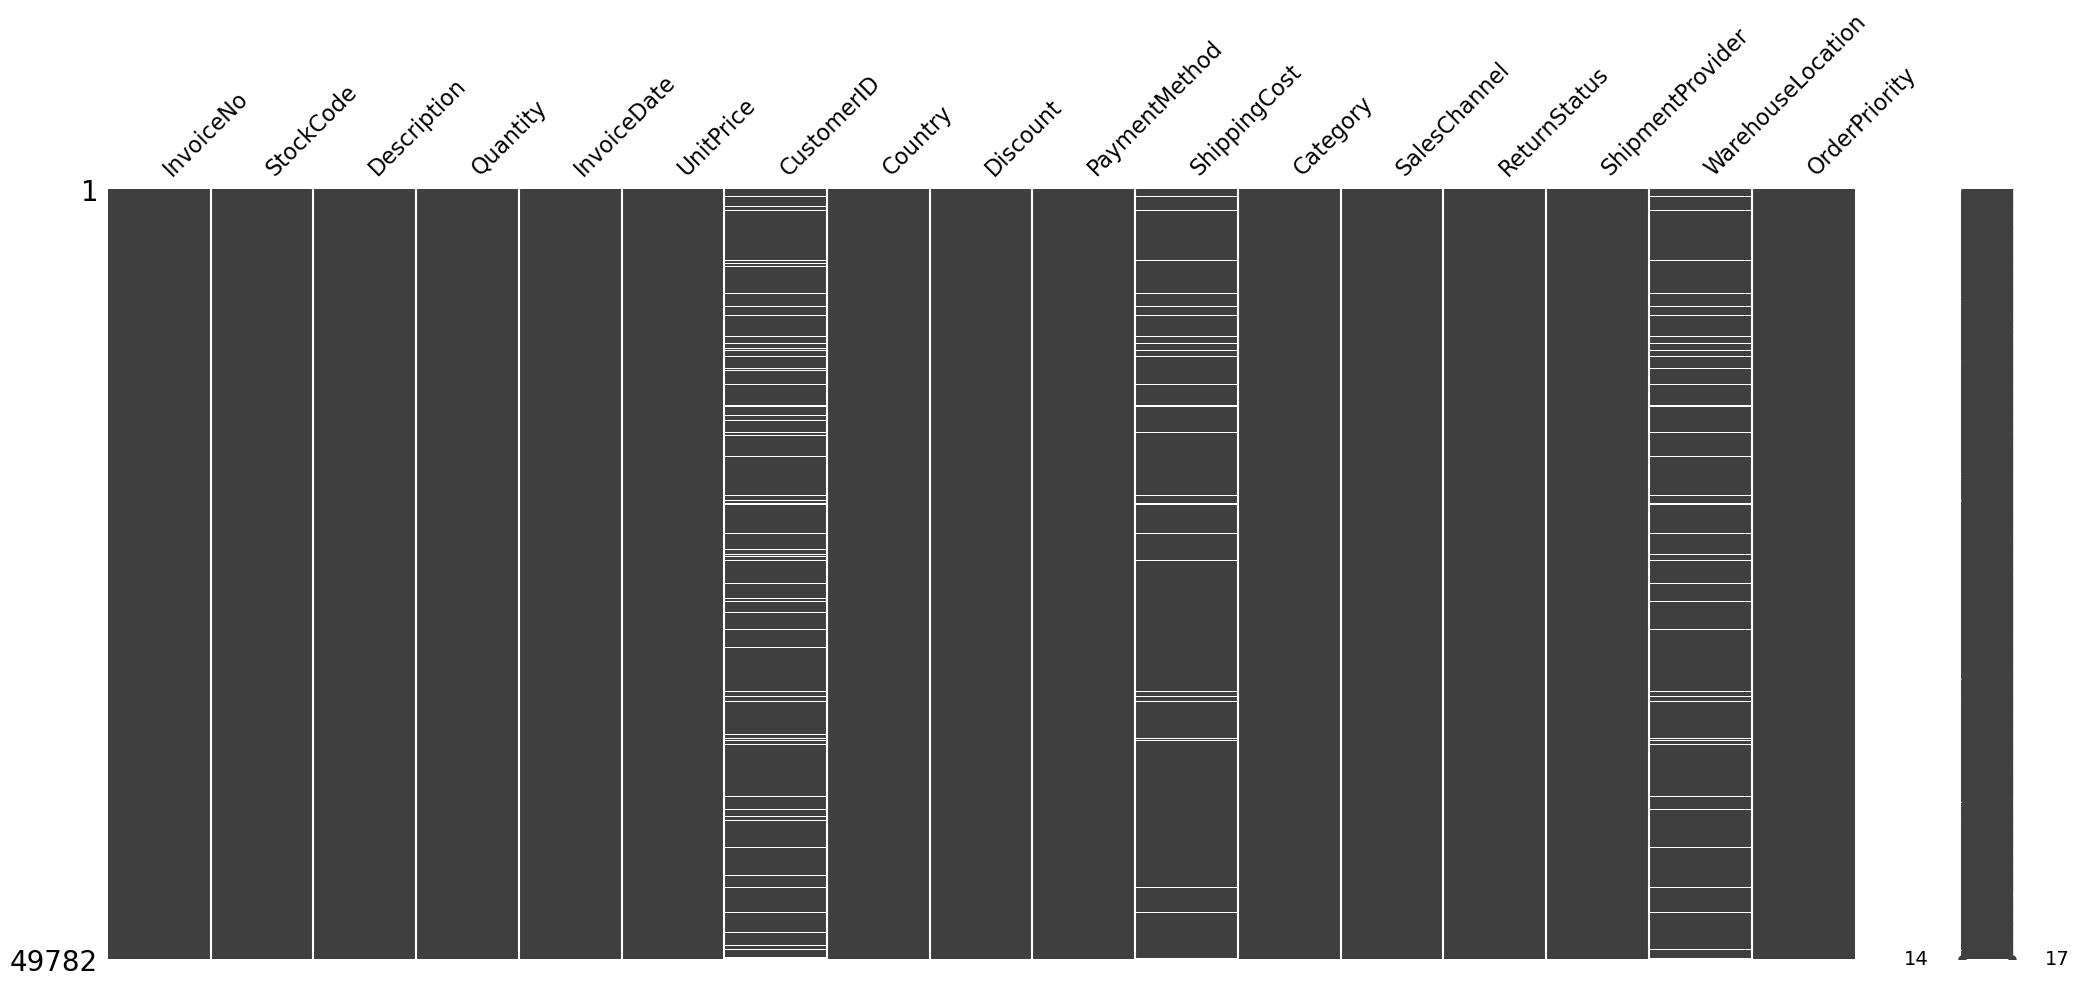

In [20]:
# Creating a visual representation of missing values ​​in the dataset
msno.matrix(df)
plt.show()

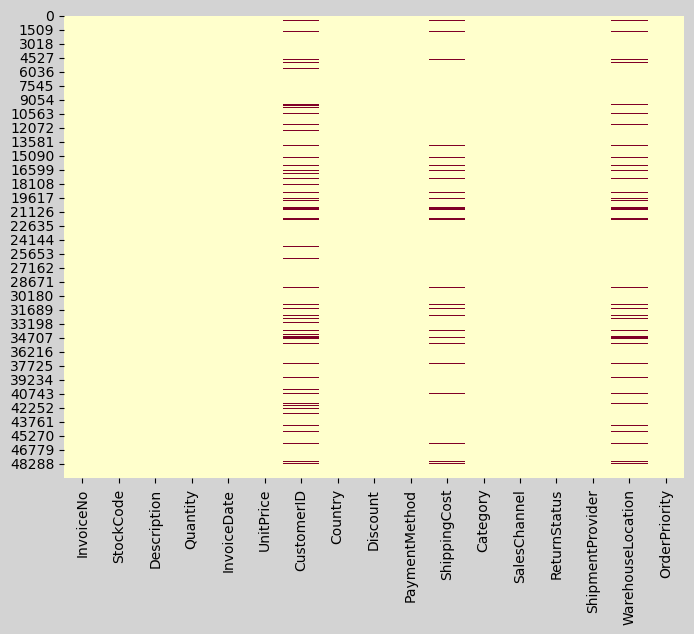

In [21]:
# Creating a heatmap for missing values
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('lightgray')

ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

sns.heatmap(df.isnull(), cbar=False, cmap='YlOrRd')
plt.show()

### -1 for missing values in CustomerID

In [22]:
# Count of missing values in CustomerID
missing_before = df['CustomerID'].isna().sum()
missing_before

4978

In [23]:
# Filling missing values with -1 in CustomerID
df['CustomerID'].fillna(-1, inplace=True)

In [24]:
# Recount the missing values
missing_after = df['CustomerID'].isna().sum()
missing_after

0

In [25]:
# How many records that we filled
filled_count = missing_before - missing_after

# Print the result
print(f"{filled_count} missing data in CustomerID column filled with -1.")

4978 missing data in CustomerID column filled with -1.


### 'Unknown' for missing values in WarehouseLocation

In [26]:
# Count of missing values in CustomerID
missing_before = df['WarehouseLocation'].isna().sum()
missing_before

3485

In [27]:
# Filling missing values with 'Unknown' in WarehouseLocation
df['WarehouseLocation'].fillna('Unknown', inplace=True)

In [28]:
# Recount the missing values
missing_after = df['WarehouseLocation'].isna().sum()
missing_after

0

In [29]:
# How many records that we filled
filled_count = missing_before - missing_after

# Print the result
print(f"{filled_count} missing data in WarehouseLocation column filled with 'Unknown'.")

3485 missing data in WarehouseLocation column filled with 'Unknown'.


### Filling in null ShippingCost values ​​by country  
(Shipments to the same country may have similar shipping costs.)

In [30]:
# Do we have any negative shipping cost?
(df['ShippingCost'] < 0).sum()

0

In [31]:
# Count of missing values in CustomerID
missing_before = df['ShippingCost'].isna().sum()
missing_before

2489

In [32]:
# Filling missing values with median for each country in WarehouseLocation
df['ShippingCost'] = df.groupby('Country')['ShippingCost'].transform(lambda x: x.fillna(x.median()))

In [33]:
# Recount the missing values
missing_after = df['ShippingCost'].isna().sum()
missing_after

0

In [34]:
# How many records that we filled
filled_count = missing_before - missing_after

# Print the result
print(f"{filled_count} missing data in ShippingCost column filled with median for each country.")

2489 missing data in ShippingCost column filled with median for each country.


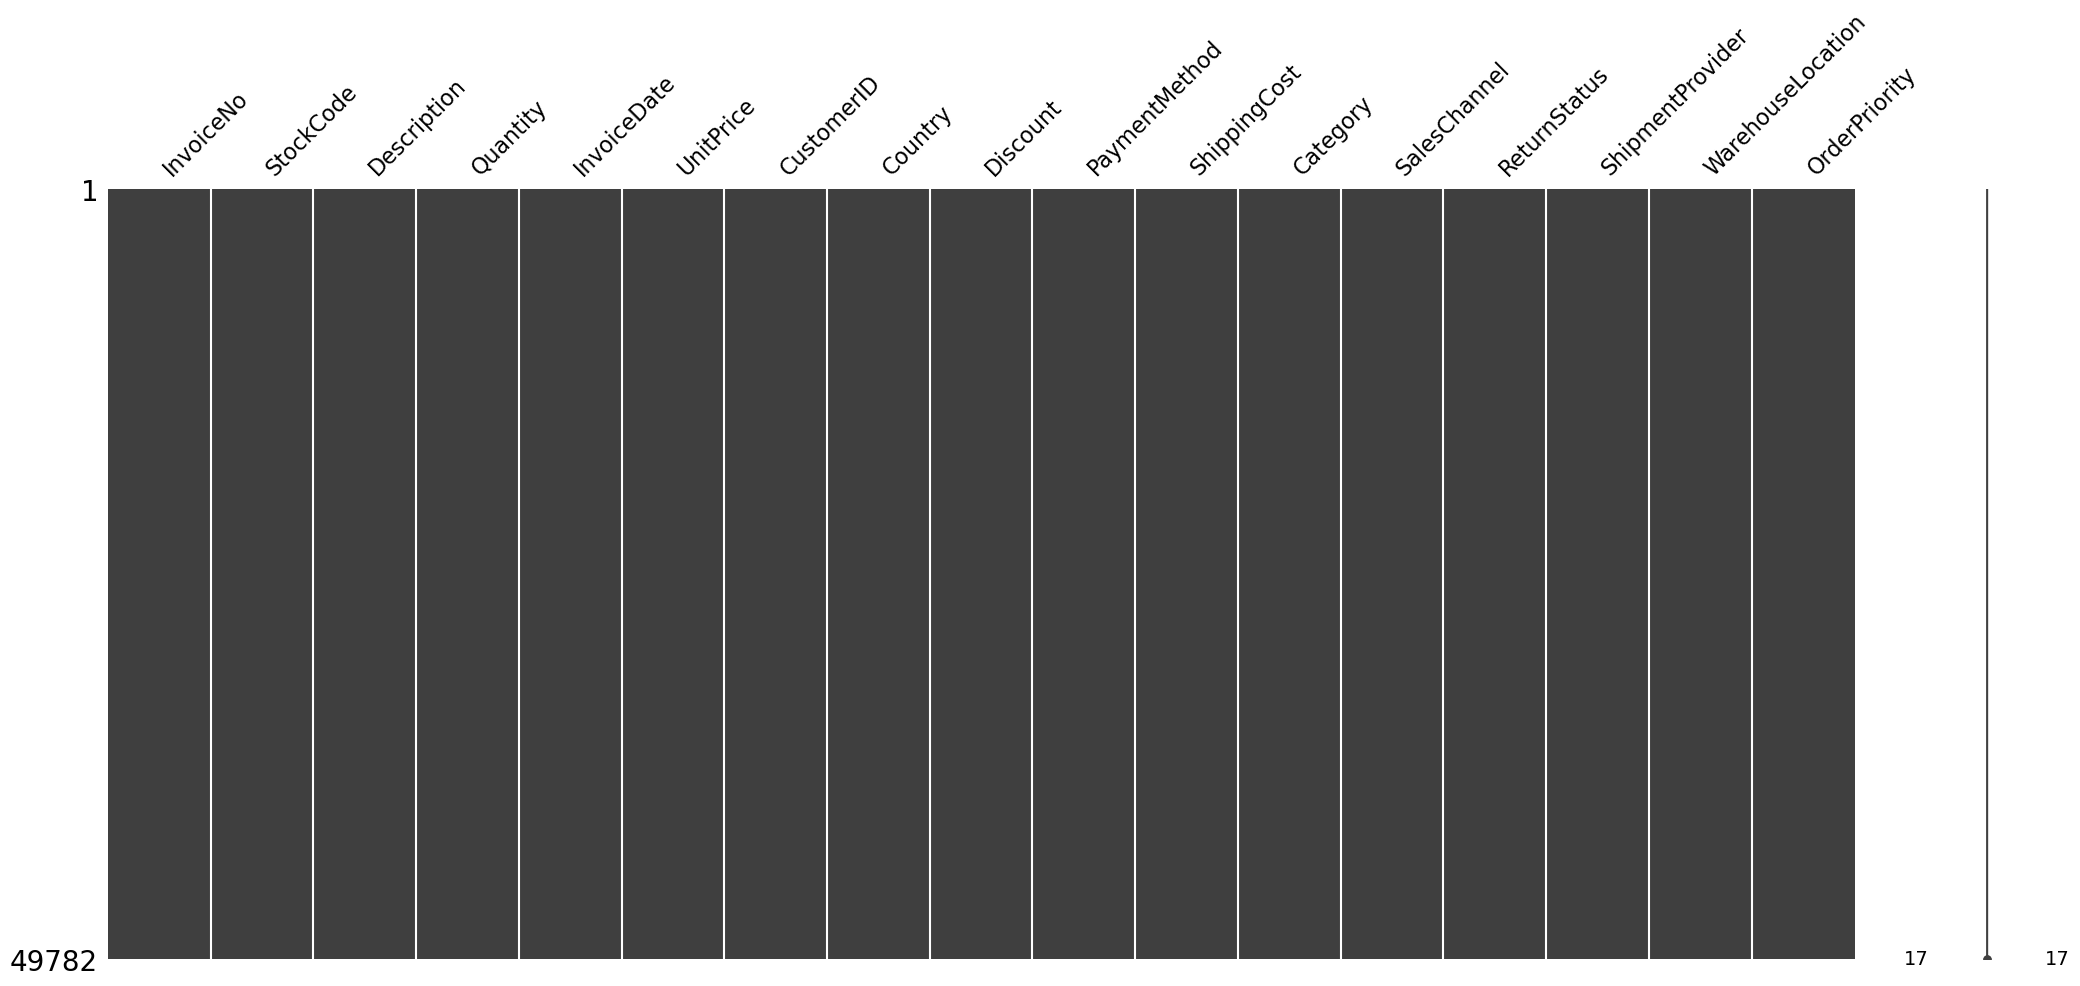

In [35]:
# Recheck
msno.matrix(df)
plt.show()

In [36]:
# Percentage of null values
df.isnull().mean() * 100

InvoiceNo            0.0
StockCode            0.0
Description          0.0
Quantity             0.0
InvoiceDate          0.0
UnitPrice            0.0
CustomerID           0.0
Country              0.0
Discount             0.0
PaymentMethod        0.0
ShippingCost         0.0
Category             0.0
SalesChannel         0.0
ReturnStatus         0.0
ShipmentProvider     0.0
WarehouseLocation    0.0
OrderPriority        0.0
dtype: float64

## Step 3: Cleaning Inconsistent and Invalid Data

In [34]:
# Fixing inconsistent values in 'UnitPrice'
# Cleaning up negative or unrealistic values in 'Quantity'
# Standardizing the 'PaymentMethod' column
# and more

### Finding negative values

In [37]:
# First, let's select the rows where at least one of the Quantity and UnitPrice columns is negative.
negative_values = df[(df['Quantity'] < 0) | (df['UnitPrice'] < 0)]
negative_values

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00:00,-68.11,-1,United Kingdom,1.501433,Bank Transfer,17.41,Electronics,In-store,Not Returned,FedEx,Unknown,Medium
144,451279,SKU_1617,Wall Clock,-2,2020-01-07 00:00:00,34.06,-1,Spain,0.340000,Credit Card,18.02,Furniture,Online,Not Returned,DHL,Unknown,Medium
147,747972,SKU_1514,Desk Lamp,-26,2020-01-07 03:00:00,-72.33,-1,Netherlands,1.972087,paypall,17.67,Electronics,In-store,Not Returned,Royal Mail,Unknown,Low
167,318969,SKU_1115,Desk Lamp,-19,2020-01-07 23:00:00,-3.61,-1,Italy,1.052254,Credit Card,17.27,Apparel,In-store,Not Returned,UPS,Unknown,High
176,285340,SKU_1710,Blue Pen,-3,2020-01-08 08:00:00,85.95,-1,Netherlands,0.260000,Credit Card,17.67,Accessories,In-store,Not Returned,UPS,Unknown,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49730,487771,SKU_1083,Wall Clock,-7,2025-09-03 02:00:00,-57.31,-1,United Kingdom,1.139869,paypall,17.41,Accessories,Online,Not Returned,DHL,Unknown,Low
49739,106493,SKU_1736,Desk Lamp,-40,2025-09-03 11:00:00,-51.34,-1,Netherlands,0.230000,Bank Transfer,17.67,Accessories,In-store,Not Returned,FedEx,Unknown,Medium
49749,540459,SKU_1405,White Mug,-36,2025-09-03 21:00:00,12.21,-1,Portugal,0.290000,paypall,17.41,Stationery,Online,Not Returned,UPS,Unknown,High
49760,726763,SKU_1273,White Mug,-34,2025-09-04 08:00:00,10.34,-1,France,0.350000,Credit Card,17.75,Furniture,Online,Not Returned,DHL,Unknown,High


In [38]:
# Now let's filter out those whose ReturnStatus is "Not Returned" from this selection.
not_returned_negatives = negative_values[negative_values['ReturnStatus'] == 'Not Returned']
not_returned_negatives.loc[:, ['InvoiceNo', 'Description', 'Quantity', 'UnitPrice', 'ReturnStatus']]

,InvoiceNo,Description,Quantity,UnitPrice,ReturnStatus
4,359178,USB Cable,-30,-68.11,Not Returned
144,451279,Wall Clock,-2,34.06,Not Returned
147,747972,Desk Lamp,-26,-72.33,Not Returned
167,318969,Desk Lamp,-19,-3.61,Not Returned
176,285340,Blue Pen,-3,85.95,Not Returned
...,...,...,...,...,...
49730,487771,Wall Clock,-7,-57.31,Not Returned
49739,106493,Desk Lamp,-40,-51.34,Not Returned
49749,540459,White Mug,-36,12.21,Not Returned
49760,726763,White Mug,-34,10.34,Not Returned


In [39]:
# How many "Not Returned" but negatives
print(f"{len(not_returned_negatives)} 'Not Returned', but has negative values in Quantity or UnitPrice.")

2241 'Not Returned', but has negative values in Quantity or UnitPrice.


### Changing (-) to (+) for not_returned_negatives

In [40]:
# For Quantity;
df.loc[(df['Quantity'] < 0) & (df['ReturnStatus'] == 'Not Returned'), 'Quantity'] = df['Quantity'].abs()

# For UnitPrice;
df.loc[(df['UnitPrice'] < 0) & (df['ReturnStatus'] == 'Not Returned'), 'UnitPrice'] = df['UnitPrice'].abs()

In [41]:
# Check the values again
print(f"{sum(((df['Quantity'] < 0) | (df['UnitPrice'] < 0)) & (df['ReturnStatus'] == 'Not Returned'))} 'Not Returned', but has negative values in Quantity or UnitPrice.")

0 'Not Returned', but has negative values in Quantity or UnitPrice.


### Finding AVG prices

In [42]:
# Let's look our products
df['Description'].unique()

array(['White Mug', 'Headphones', 'Desk Lamp', 'USB Cable',
       'Office Chair', 'Notebook', 'Wireless Mouse', 'Blue Pen',
       'Wall Clock', 'T-shirt', 'Backpack'], dtype=object)

In [43]:
# Calculating average prices by filtering and grouping by products with prices greater than zero
product_avg_prices = df[df['ReturnStatus'] == 'Not Returned' ].groupby('Description')['UnitPrice'].mean().sort_values(ascending=False)
print("Ürünlere Göre Ortalama Fiyatlar:", product_avg_prices)

Ürünlere Göre Ortalama Fiyatlar: Description
White Mug         51.425068
Headphones        51.096533
Blue Pen          51.020782
Notebook          50.914743
Wireless Mouse    50.896161
Desk Lamp         50.742113
Wall Clock        50.541730
USB Cable         50.441277
Backpack          50.391365
T-shirt           50.351364
Office Chair      50.046334
Name: UnitPrice, dtype: float64


### Standardization for 'Returned' products

In [44]:
# Filtering 'Returned' products
df[df['ReturnStatus'] == 'Returned']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00:00,29.11,50472,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
10,621430,SKU_1144,Notebook,49,2020-01-01 10:00:00,87.56,13030,United Kingdom,0.19,paypall,9.83,Stationery,In-store,Returned,UPS,Paris,Medium
19,887201,SKU_1119,USB Cable,46,2020-01-01 19:00:00,27.03,19819,Spain,0.26,Credit Card,23.80,Furniture,In-store,Returned,UPS,London,Medium
20,421879,SKU_1578,Wall Clock,43,2020-01-01 20:00:00,77.17,24716,Norway,0.30,Bank Transfer,24.77,Accessories,In-store,Returned,FedEx,Berlin,Low
33,586232,SKU_1722,Wall Clock,14,2020-01-02 09:00:00,10.32,54696,France,0.01,Credit Card,28.90,Stationery,In-store,Returned,DHL,Rome,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49751,352868,SKU_1131,Desk Lamp,17,2025-09-03 23:00:00,97.76,15395,Australia,0.02,Credit Card,6.38,Apparel,Online,Returned,DHL,Amsterdam,Medium
49757,170681,SKU_1613,Blue Pen,3,2025-09-04 05:00:00,94.36,84180,Germany,0.32,paypall,9.33,Furniture,Online,Returned,FedEx,Paris,Medium
49769,701257,SKU_1092,Office Chair,19,2025-09-04 17:00:00,81.91,64156,Belgium,0.48,Bank Transfer,13.45,Stationery,In-store,Returned,DHL,Paris,Medium
49775,405597,SKU_1140,Backpack,37,2025-09-04 23:00:00,66.64,12024,Italy,0.35,paypall,19.93,Apparel,Online,Returned,UPS,Rome,Low


In [45]:
# For standardization, finding positive values in Quantity and UnitPrice for Returned products
df[(df['ReturnStatus'] == 'Returned') & ((df['Quantity'] > 0) | (df['UnitPrice'] > 0))]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00:00,29.11,50472,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
10,621430,SKU_1144,Notebook,49,2020-01-01 10:00:00,87.56,13030,United Kingdom,0.19,paypall,9.83,Stationery,In-store,Returned,UPS,Paris,Medium
19,887201,SKU_1119,USB Cable,46,2020-01-01 19:00:00,27.03,19819,Spain,0.26,Credit Card,23.80,Furniture,In-store,Returned,UPS,London,Medium
20,421879,SKU_1578,Wall Clock,43,2020-01-01 20:00:00,77.17,24716,Norway,0.30,Bank Transfer,24.77,Accessories,In-store,Returned,FedEx,Berlin,Low
33,586232,SKU_1722,Wall Clock,14,2020-01-02 09:00:00,10.32,54696,France,0.01,Credit Card,28.90,Stationery,In-store,Returned,DHL,Rome,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49751,352868,SKU_1131,Desk Lamp,17,2025-09-03 23:00:00,97.76,15395,Australia,0.02,Credit Card,6.38,Apparel,Online,Returned,DHL,Amsterdam,Medium
49757,170681,SKU_1613,Blue Pen,3,2025-09-04 05:00:00,94.36,84180,Germany,0.32,paypall,9.33,Furniture,Online,Returned,FedEx,Paris,Medium
49769,701257,SKU_1092,Office Chair,19,2025-09-04 17:00:00,81.91,64156,Belgium,0.48,Bank Transfer,13.45,Stationery,In-store,Returned,DHL,Paris,Medium
49775,405597,SKU_1140,Backpack,37,2025-09-04 23:00:00,66.64,12024,Italy,0.35,paypall,19.93,Apparel,Online,Returned,UPS,Rome,Low


In [46]:
# Changing (+) values to (-) for all Returned products
df.loc[df['ReturnStatus'] == 'Returned', ['Quantity', 'UnitPrice']] = df.loc[df['ReturnStatus'] == 'Returned', ['Quantity', 'UnitPrice']].apply(lambda x: -abs(x))

In [47]:
# To check
((df['ReturnStatus'] == 'Returned') & ((df['Quantity'] > 0) | (df['UnitPrice'] > 0))).sum()

0

### Unrealistic discount rate 

In [48]:
# Discounts under 0%
(df['Discount'] < 0).sum()

0

In [49]:
# Discounts over 100%
df[df['Discount'] >= 1].sort_values('Discount', ascending = False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
38189,773527,SKU_1057,Backpack,38,2024-05-10 05:00:00,5.90,-1,Spain,1.999764,Bank Transfer,18.020,Electronics,Online,Not Returned,FedEx,Unknown,Low
48065,231190,SKU_1908,T-shirt,-43,2025-06-25 17:00:00,-80.61,-1,United Kingdom,1.999605,Credit Card,17.410,Accessories,Online,Returned,DHL,Unknown,Low
24056,496713,SKU_1540,Blue Pen,22,2022-09-29 08:00:00,94.30,-1,Australia,1.998946,paypall,17.265,Furniture,In-store,Not Returned,UPS,Unknown,Medium
23323,183804,SKU_1581,Office Chair,11,2022-08-29 19:00:00,65.88,-1,Australia,1.998878,paypall,17.265,Electronics,In-store,Not Returned,Royal Mail,Unknown,Medium
48035,448355,SKU_1046,Wireless Mouse,28,2025-06-24 11:00:00,21.91,-1,Belgium,1.998808,Credit Card,17.490,Furniture,In-store,Not Returned,Royal Mail,Unknown,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18036,982169,SKU_1640,White Mug,35,2022-01-21 12:00:00,18.18,-1,Netherlands,1.007336,Bank Transfer,17.670,Furniture,In-store,Not Returned,FedEx,Unknown,Medium
44497,230349,SKU_1975,USB Cable,-5,2025-01-28 01:00:00,-36.14,-1,France,1.003871,Bank Transfer,17.750,Electronics,Online,Returned,DHL,Unknown,Medium
39507,556076,SKU_1140,Wall Clock,41,2024-07-04 03:00:00,48.79,-1,France,1.002733,Credit Card,17.750,Apparel,In-store,Not Returned,FedEx,Unknown,High
21701,449352,SKU_1483,Desk Lamp,7,2022-06-23 05:00:00,79.56,-1,France,1.002310,Bank Transfer,17.750,Accessories,In-store,Not Returned,DHL,Unknown,Low


In [50]:
# Average discounts under 100% by product
average_discounts = df[df['Discount'] < 1].groupby('Description')['Discount'].mean()
average_discounts

Description
Backpack          0.252069
Blue Pen          0.250278
Desk Lamp         0.248855
Headphones        0.248638
Notebook          0.250060
Office Chair      0.253214
T-shirt           0.251625
USB Cable         0.251650
Wall Clock        0.250698
White Mug         0.248803
Wireless Mouse    0.251125
Name: Discount, dtype: float64

In [51]:
# Changing unrealistic discount rates with average by product
df.loc[df['Discount'] >= 1, 'Discount'] = df.loc[df['Discount'] >= 1, 'Description'].map(average_discounts)

In [52]:
# Check
(df['Discount'] >= 1).sum()

0

### Standardizing the 'PaymentMethod'

In [53]:
# Which 'PaymentMethod' columns do we have?
df['PaymentMethod'].unique()

array(['Bank Transfer', 'paypall', 'Credit Card'], dtype=object)

In [54]:
# Create a mapping dictionary
payment_method_map = {
    'Bank Transfer': 'Bank Transfer',
    'paypall': 'PayPal',
    'Credit Card': 'Credit Card'
}

# Apply the mapping to standardize payment methods
df['PaymentMethod'] = df['PaymentMethod'].map(payment_method_map)

In [55]:
df['PaymentMethod'].unique()

array(['Bank Transfer', 'PayPal', 'Credit Card'], dtype=object)

## Step 4: Detecting and Handling Outliers

In [54]:
# Boxplot for outlier detection

# Example: Removing outliers
# df = df[df['UnitPrice'] < df['UnitPrice'].quantile(0.99)]

### UnitPrice

In [56]:
#Copy the df to df1 for calculating absolute UnitPrice values temporarily
df1 = df.copy()
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00:00,1.71,37039,Australia,0.47000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00:00,41.25,19144,Spain,0.19000,PayPal,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,-49,2020-01-01 02:00:00,-29.11,50472,Germany,0.35000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00:00,76.68,96586,Netherlands,0.14000,PayPal,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,30,2020-01-01 04:00:00,68.11,-1,United Kingdom,0.25165,Bank Transfer,17.41,Electronics,In-store,Not Returned,FedEx,Unknown,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,354083,SKU_1562,Blue Pen,-25,2025-09-05 01:00:00,-70.92,51445,Spain,0.20000,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00:00,51.74,28879,United States,0.23000,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00:00,85.25,21825,Portugal,0.20000,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00:00,39.64,43199,United Kingdom,0.31000,PayPal,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium


In [57]:
# Finding unit price for all columns
df1[['UnitPrice', 'Quantity']] = df1[['UnitPrice', 'Quantity']].abs()
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00:00,1.71,37039,Australia,0.47000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00:00,41.25,19144,Spain,0.19000,PayPal,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00:00,29.11,50472,Germany,0.35000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00:00,76.68,96586,Netherlands,0.14000,PayPal,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,30,2020-01-01 04:00:00,68.11,-1,United Kingdom,0.25165,Bank Transfer,17.41,Electronics,In-store,Not Returned,FedEx,Unknown,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49777,354083,SKU_1562,Blue Pen,25,2025-09-05 01:00:00,70.92,51445,Spain,0.20000,Credit Card,8.96,Electronics,Online,Returned,UPS,Berlin,Medium
49778,296698,SKU_1930,USB Cable,7,2025-09-05 02:00:00,51.74,28879,United States,0.23000,Bank Transfer,23.55,Electronics,Online,Not Returned,FedEx,Amsterdam,Low
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00:00,85.25,21825,Portugal,0.20000,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00:00,39.64,43199,United Kingdom,0.31000,PayPal,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium


In [58]:
columns_of_interest = ['Quantity', 'UnitPrice', 'Discount', 'ShippingCost']

In [59]:
# Determining outliers using the IQR (Interquartile Range) method for each column
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

outliers = {}
for column in columns_of_interest:
    outliers[column] = find_outliers_iqr(df1[column])

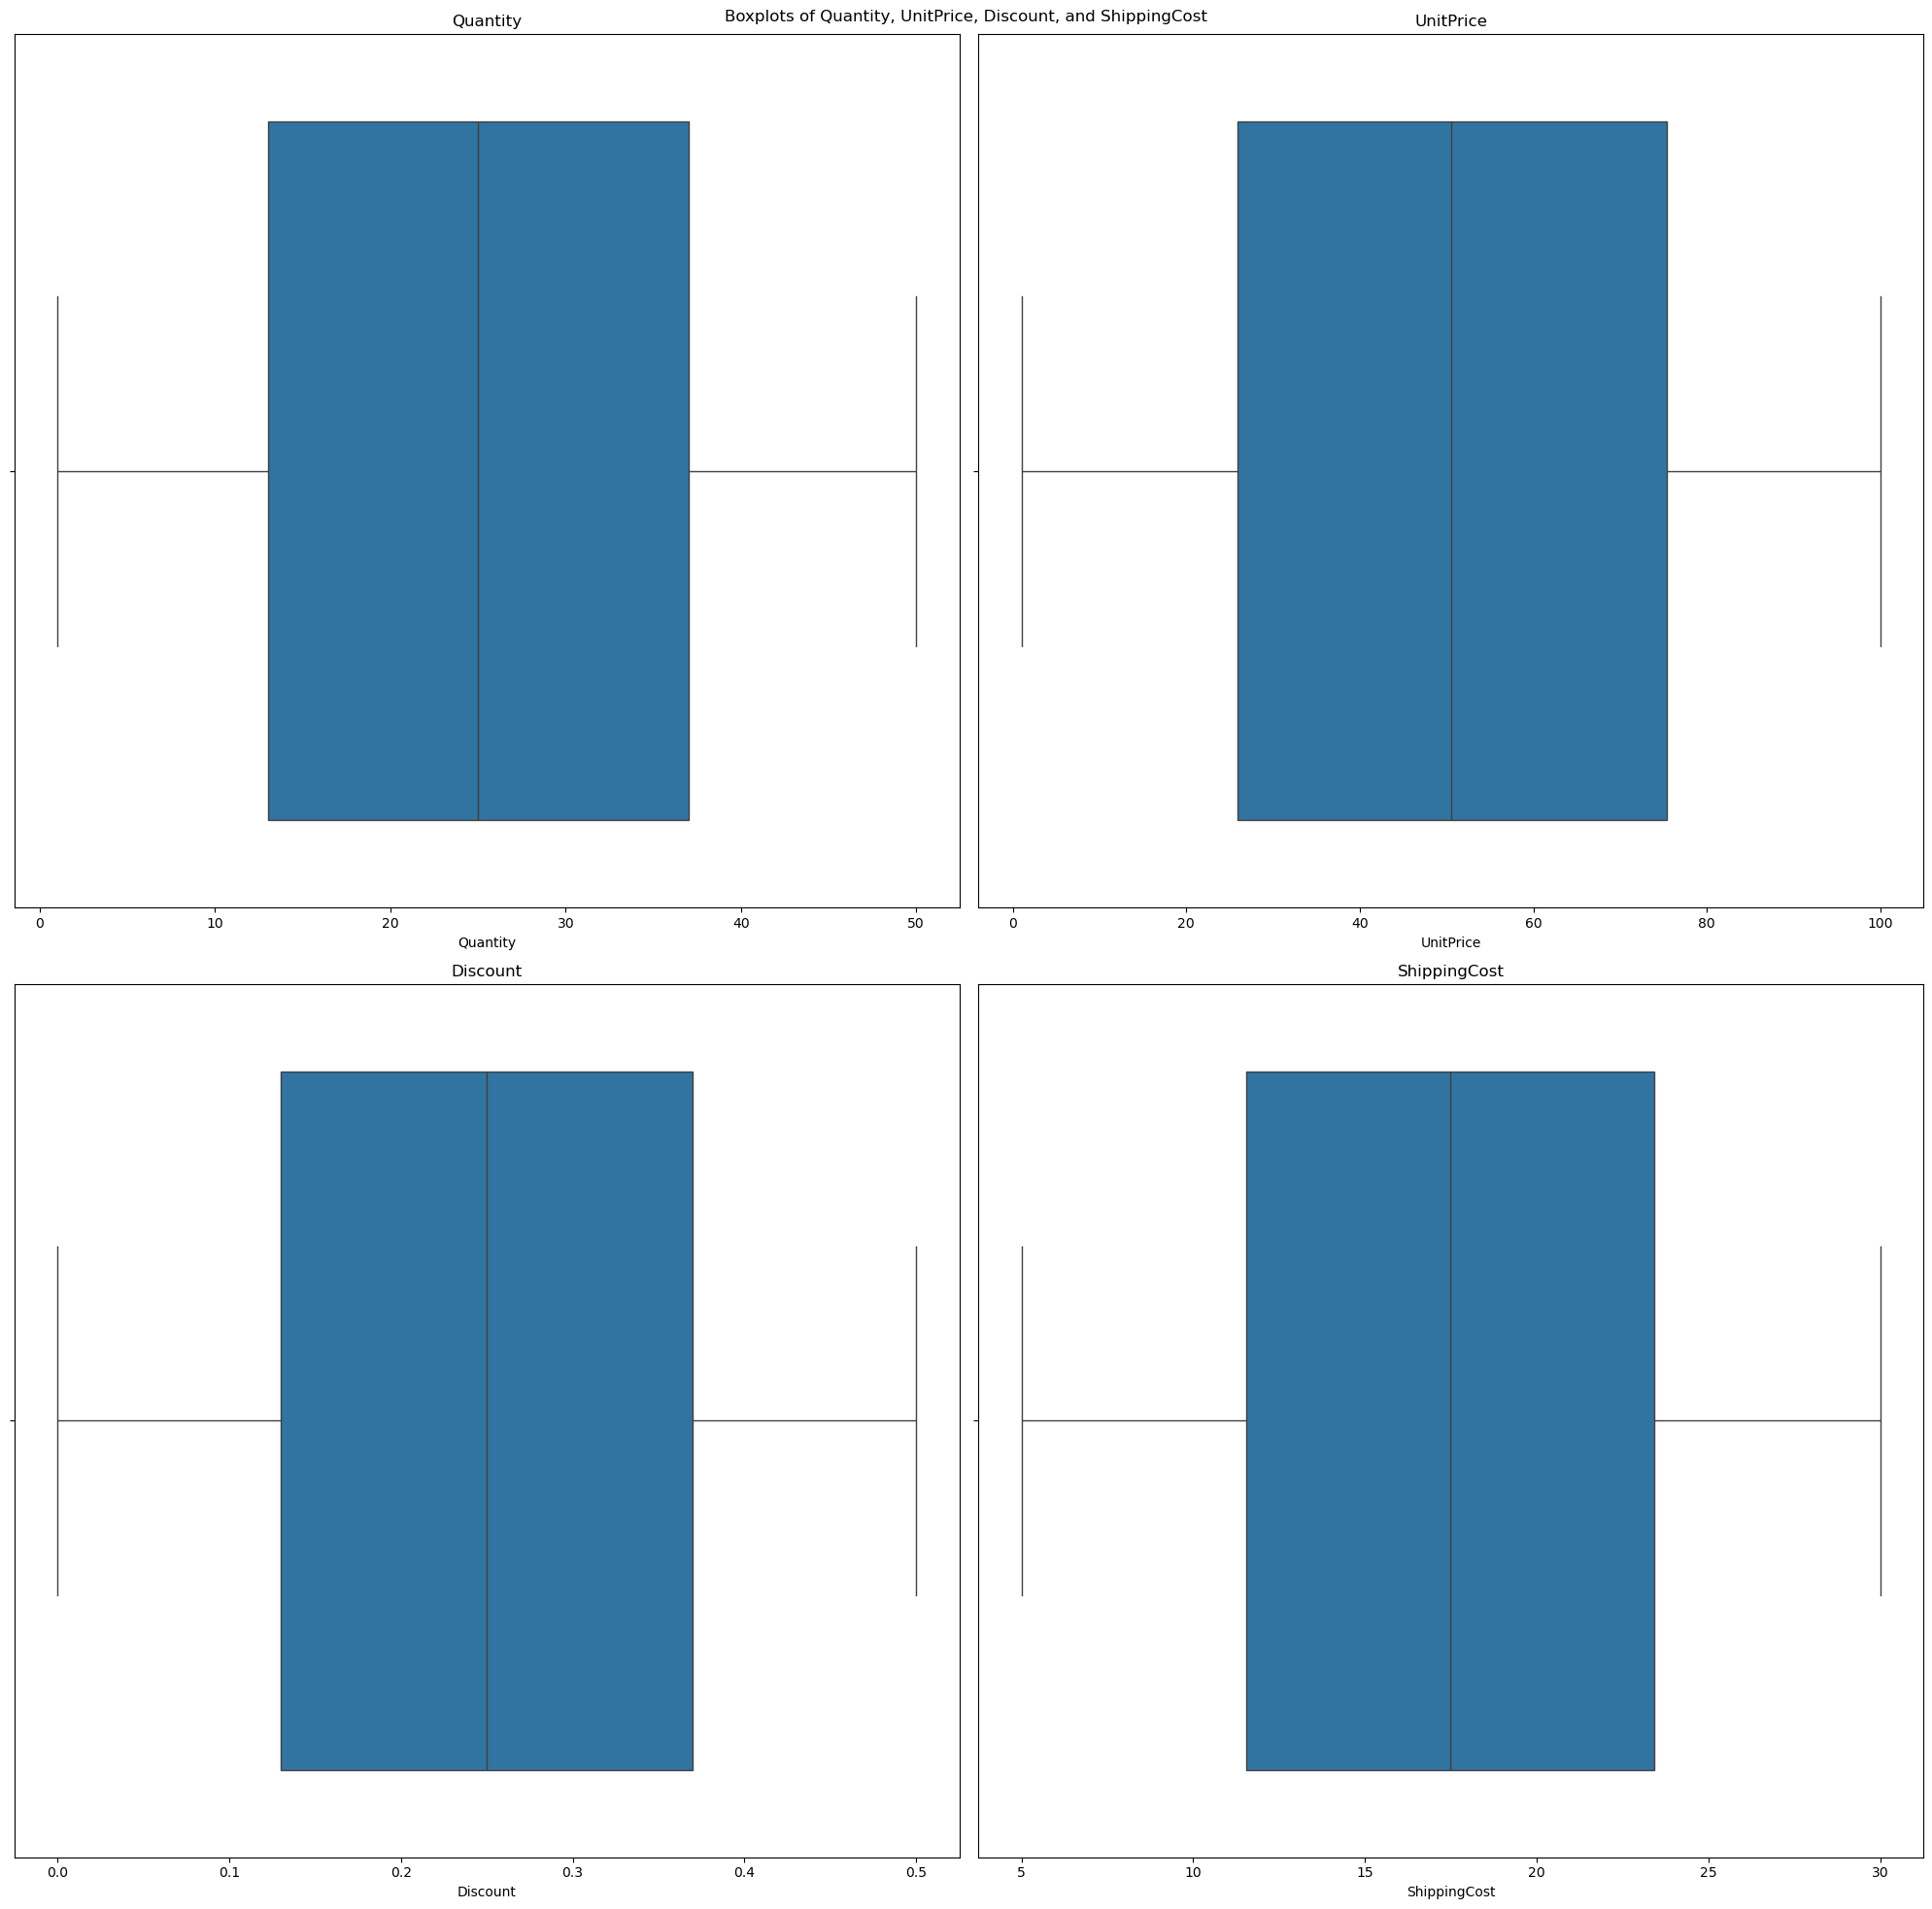

In [60]:
# Visualizations for Outliers
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle('Boxplots of Quantity, UnitPrice, Discount, and ShippingCost')

for i, column in enumerate(columns_of_interest):
    ax = axes[i // 2, i % 2]
    sns.boxplot(x=df1[column], ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [61]:
# Results
for column in columns_of_interest:
    outlier_count = outliers[column].sum()
    outlier_percentage = (outlier_count / len(df1)) * 100
    print(f"{column}:")
    print(f"  Outlier count: {outlier_count}")
    print(f"  Outlier percentage: {outlier_percentage:.2f}%")
    print(f"  Min value: {df1[column].min()}")
    print(f"  Max value: {df1[column].max()}")
    print(f"  Mean: {df1[column].mean():.2f}")
    print(f"  Median: {df1[column].median():.2f}")
    print()

Quantity:
  Outlier count: 0
  Outlier percentage: 0.00%
  Min value: 1
  Max value: 50
  Mean: 24.93
  Median: 25.00

UnitPrice:
  Outlier count: 0
  Outlier percentage: 0.00%
  Min value: 1.0
  Max value: 100.0
  Mean: 50.63
  Median: 50.55

Discount:
  Outlier count: 0
  Outlier percentage: 0.00%
  Min value: 0.0
  Max value: 0.5
  Mean: 0.25
  Median: 0.25

ShippingCost:
  Outlier count: 0
  Outlier percentage: 0.00%
  Min value: 5.0
  Max value: 30.0
  Mean: 17.49
  Median: 17.49



## Step 5: Feature Engineering

In [61]:
# Create new feature 'TotalCost'
# Extracting Day of the Week from 'InvoiceDate'
# Extracting Month from 'InvoiceDate'

### Create new feature 'TotalCost'

In [62]:
# Calculate TotalCost
df['TotalCost'] = ((df['Quantity'] * df['UnitPrice'] * (1 - df['Discount'])) + df['ShippingCost']).round(2)

In [63]:
# Display few rows of the dataframe with the new TotalCost column
print(df[['InvoiceNo', 'Quantity', 'UnitPrice', 'Discount', 'ShippingCost', 'TotalCost']].sample(5))

       InvoiceNo  Quantity  UnitPrice  Discount  ShippingCost  TotalCost
26907     873790        36      55.63      0.49         20.60    1041.97
43037     853353        30      67.75      0.39         19.78    1259.60
19977     896551        34      31.32      0.27         24.58     801.94
29057     428391        39      10.79      0.00         15.90     436.71
37848     307941        -4     -70.71      0.04         10.02     281.55


### Extracting Day of the Week from 'InvoiceDate'

In [64]:
# Extract day of the week
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

# Display few rows to verify
print(df[['InvoiceDate', 'DayOfWeek']].sample(5))

              InvoiceDate  DayOfWeek
17427 2021-12-27 03:00:00     Monday
27564 2023-02-22 12:00:00  Wednesday
48184 2025-06-30 16:00:00     Monday
10638 2021-03-19 06:00:00     Friday
1577  2020-03-06 17:00:00     Friday


In [65]:
# Count the number of transactions for each day of the week
day_counts = df['DayOfWeek'].value_counts()
day_to_num = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

print("\nTransaction counts by day of the week:")
print(day_counts.sort_index(key=lambda x: [day_to_num[i] for i in x]))


Transaction counts by day of the week:
DayOfWeek
Monday       7104
Tuesday      7104
Wednesday    7128
Thursday     7128
Friday       7110
Saturday     7104
Sunday       7104
Name: count, dtype: int64


In [66]:
# Calculate the percentage of transactions for each day of the week
day_percentages = (day_counts / len(df) * 100).round(2)
print("\nPercentage of transactions by day of the week:")
print(day_percentages.sort_index(key=lambda x: [day_to_num[i] for i in x]))


Percentage of transactions by day of the week:
DayOfWeek
Monday       14.27
Tuesday      14.27
Wednesday    14.32
Thursday     14.32
Friday       14.28
Saturday     14.27
Sunday       14.27
Name: count, dtype: float64


### Extracting Month from 'InvoiceDate'

In [67]:
# Extract month
df['Month'] = df['InvoiceDate'].dt.month_name()

In [68]:
# Display few rows to verify
print(df[['InvoiceDate', 'Month']].sample(5))

              InvoiceDate     Month
24785 2022-10-29 17:00:00   October
1036  2020-02-13 04:00:00  February
25627 2022-12-03 19:00:00  December
21474 2022-06-13 18:00:00      June
3134  2020-05-10 14:00:00       May


In [69]:
# Sorting depends on months
month_order = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

In [70]:
# Count the number of transactions for each month
month_counts = df['Month'].value_counts().sort_index(key=lambda x: x.map(month_order))
print("\nTransaction counts by month:")
print(month_counts)


Transaction counts by month:
Month
January      4464
February     4080
March        4464
April        4320
May          4464
June         4320
July         4464
August       4464
September    3702
October      3720
November     3600
December     3720
Name: count, dtype: int64


In [71]:
# Calculate the percentage of transactions for each month
month_percentages = (month_counts / len(df) * 100).round(2).sort_index(key=lambda x: x.map(month_order))
print("\nPercentage of transactions by month:")
print(month_percentages)


Percentage of transactions by month:
Month
January      8.97
February     8.20
March        8.97
April        8.68
May          8.97
June         8.68
July         8.97
August       8.97
September    7.44
October      7.47
November     7.23
December     7.47
Name: count, dtype: float64


## Step 6: Data Visualization

### Sales Distribution by Country

In [72]:
# Bar chart for total sales by country
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)

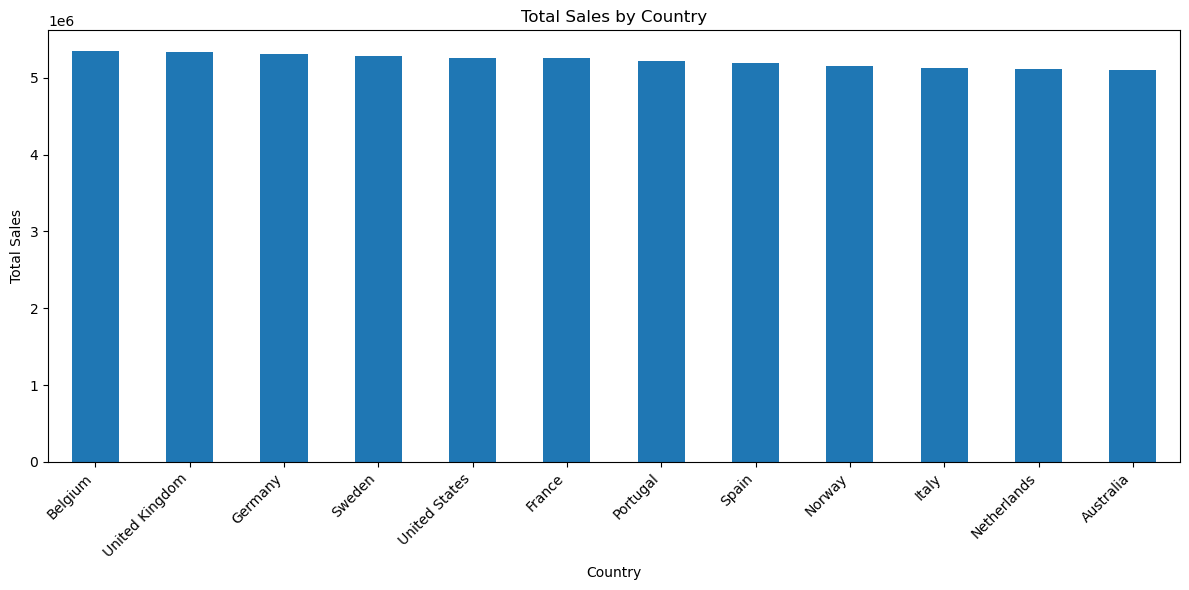

In [73]:
plt.figure(figsize=(12, 6))
country_sales.plot(kind='bar')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Payment Method Usage

In [74]:
# Pie chart for payment methods

# Calculate the distribution of payment methods
payment_methods = df['PaymentMethod'].value_counts()

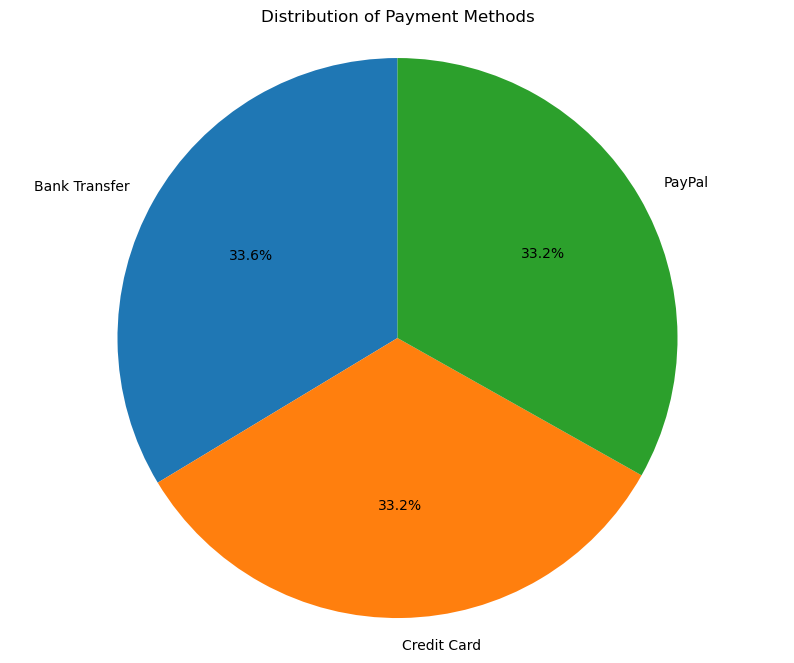

In [75]:
# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(payment_methods.values, labels=payment_methods.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Payment Methods')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### Seasonal Sales Trends

In [76]:
# Line chart for seasonal trends

# Calculate total sales for each day
daily_sales = df.groupby(df['InvoiceDate'].dt.month)['TotalCost'].sum().reset_index()
daily_sales

,InvoiceDate,TotalCost
0,1,4305648.87
1,2,3919366.96
2,3,4286935.30
3,4,4158941.89
4,5,4239700.27
5,6,4156360.57
6,7,4230735.47
7,8,4347776.36
8,9,3583208.59
9,10,3617127.48


In [77]:
# Set 'InvoiceDate' as the index
daily_sales.set_index('InvoiceDate', inplace=True)

In [78]:
# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x=daily_sales.index, y='TotalCost')

<Axes: xlabel='InvoiceDate', ylabel='TotalCost'>

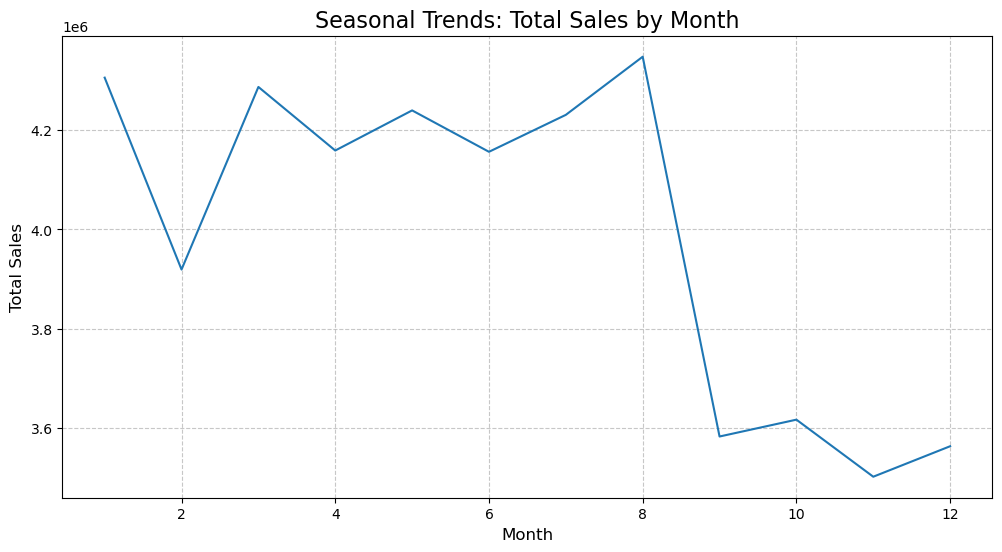

In [79]:
# Customize the plot
plt.title('Seasonal Trends: Total Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### Quantity and Revenue Correlation

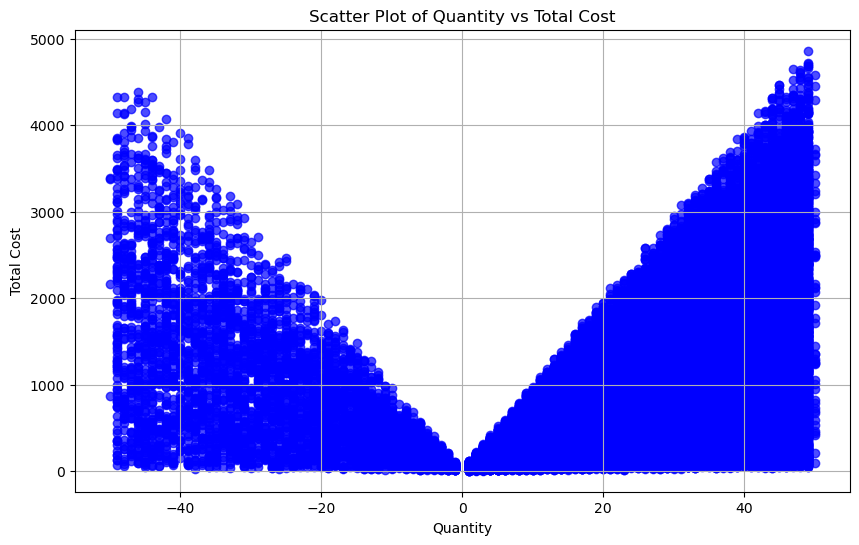

In [80]:
# Scatter plot for quantity and total cost

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity'], df['TotalCost'], color='blue', alpha=0.7)

# Set labels and title
plt.xlabel('Quantity')
plt.ylabel('Total Cost')
plt.title('Scatter Plot of Quantity vs Total Cost')

# Add grid lines
plt.grid(True)

# Show the plot
plt.show()

### Shipping Cost Analysis

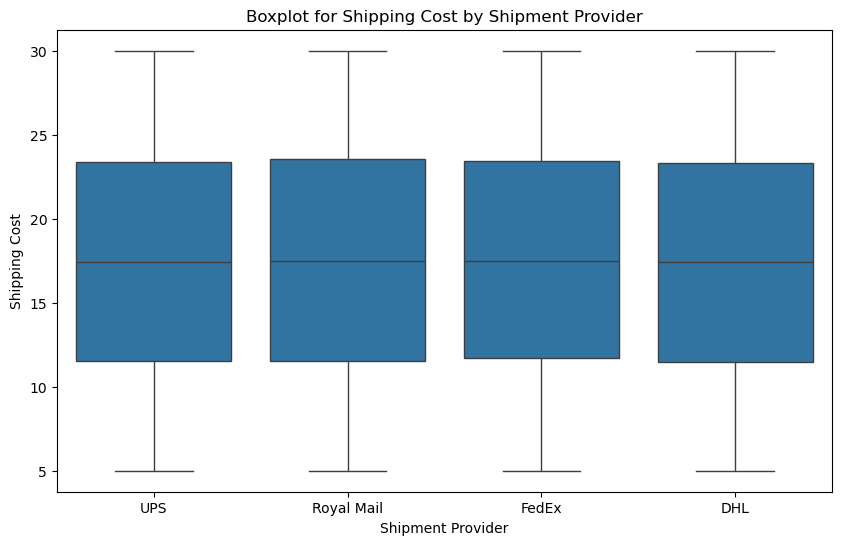

In [81]:
# Boxplot for shipping cost by shipment provider

plt.figure(figsize=(10, 6))
sns.boxplot(x='ShipmentProvider', y='ShippingCost', data=df)
plt.title('Boxplot for Shipping Cost by Shipment Provider')
plt.xlabel('Shipment Provider')
plt.ylabel('Shipping Cost')
plt.show()


### Top Performing Products

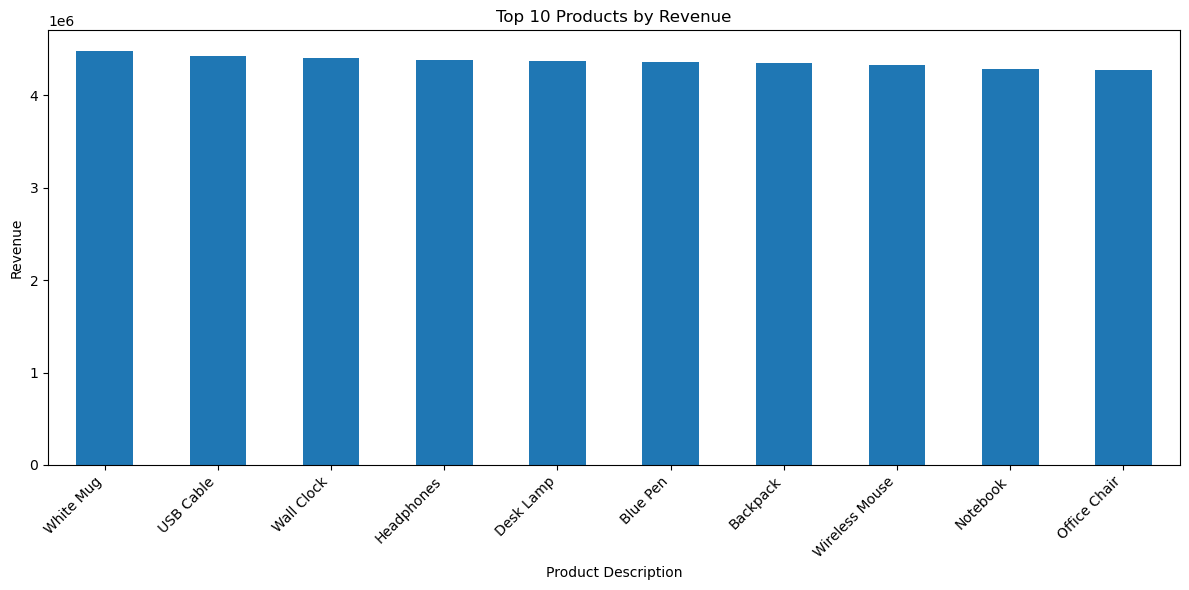

In [82]:
# Bar chart for top 10 products by TotalCost

# Group by product and sum TotalCost
product_revenue = df.groupby('Description')['TotalCost'].sum().sort_values(ascending=False)

# Plot top 10 products
plt.figure(figsize=(12, 6))
product_revenue.head(10).plot(kind='bar')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Description')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Customer Behavior Analysis

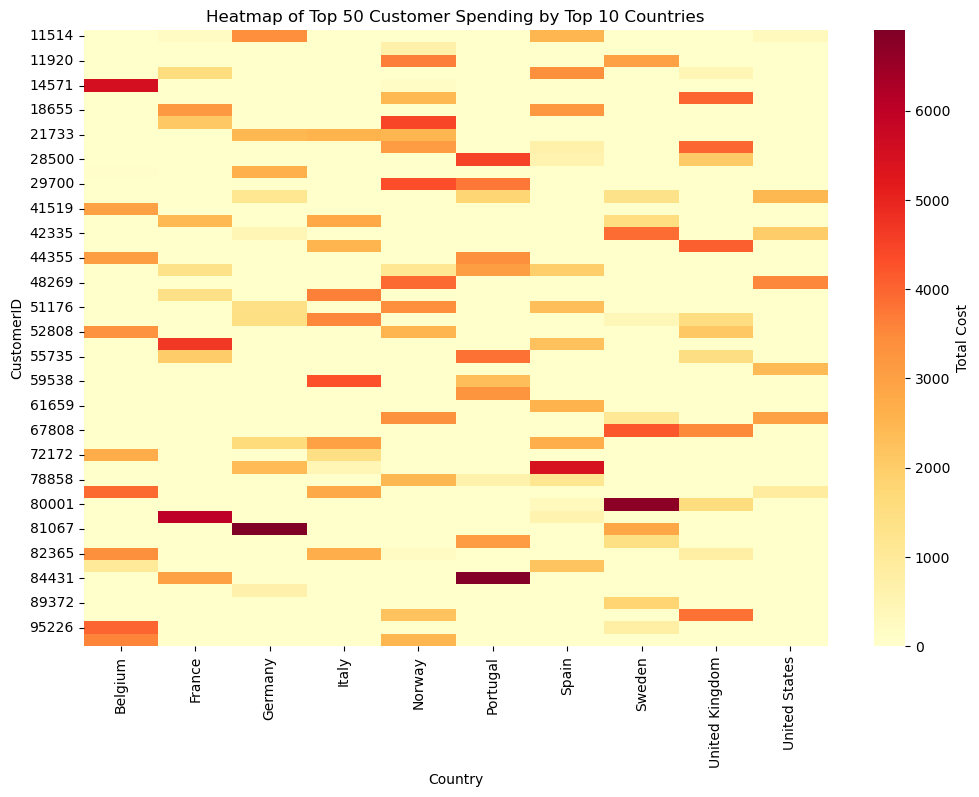

In [86]:
# Group by CustomerID and Country, then sum TotalCost
customer_spending = df[df['CustomerID'] != -1].groupby(['CustomerID', 'Country'])['TotalCost'].sum().reset_index()

# Select the top 50 customers who spend the most and the top 10 countries where transactions are made
top_customers = customer_spending.groupby('CustomerID')['TotalCost'].sum().nlargest(50).index
top_countries = customer_spending.groupby('Country')['TotalCost'].sum().nlargest(10).index

# Create the pivot table with these selected customers and countries
pivot_table = customer_spending[
    customer_spending['CustomerID'].isin(top_customers) & 
    customer_spending['Country'].isin(top_countries)
].pivot_table(values='TotalCost', index='CustomerID', columns='Country', aggfunc='sum', fill_value=0)

# Heatmap for customer spending
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=False, cbar_kws={'label': 'Total Cost'})
plt.title('Heatmap of Top 50 Customer Spending by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('CustomerID')
plt.show()

### Order Return Analysis

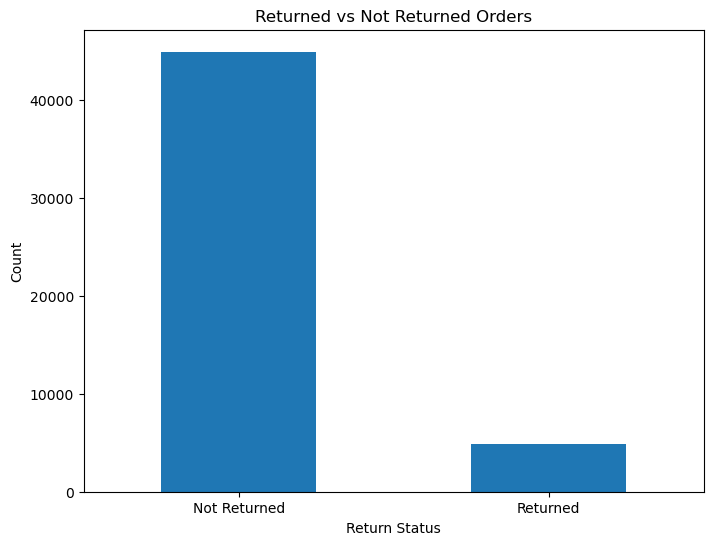

In [87]:
# Bar chart for returned vs not returned
return_counts = df['ReturnStatus'].value_counts()

plt.figure(figsize=(8, 6))
return_counts.plot(kind='bar')
plt.title('Returned vs Not Returned Orders')
plt.xlabel('Return Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [88]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Discount', 'PaymentMethod',
       'ShippingCost', 'Category', 'SalesChannel', 'ReturnStatus',
       'ShipmentProvider', 'WarehouseLocation', 'OrderPriority', 'TotalCost',
       'DayOfWeek', 'Month', 'TotalSales'],
      dtype='object')

### Correlation Analysis

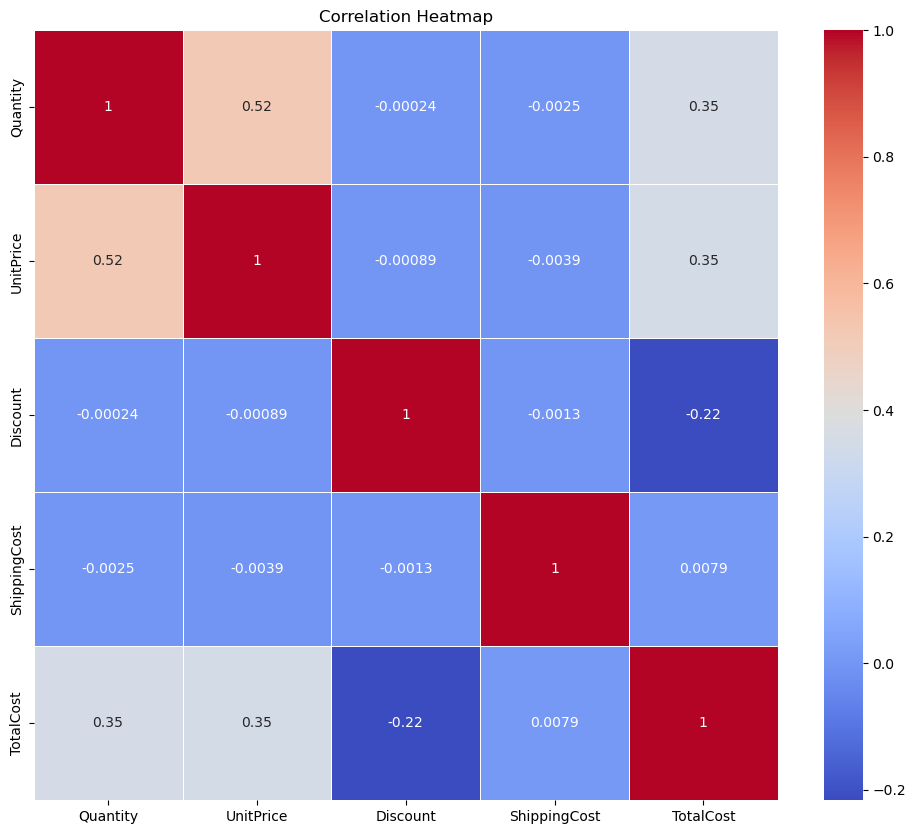

In [89]:
# Correlation heatmap

# Select numeric columns
numeric_columns = ['Quantity', 'UnitPrice', 'Discount', 'ShippingCost', 'TotalCost']

# Create correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


### Sales Channel Analysis

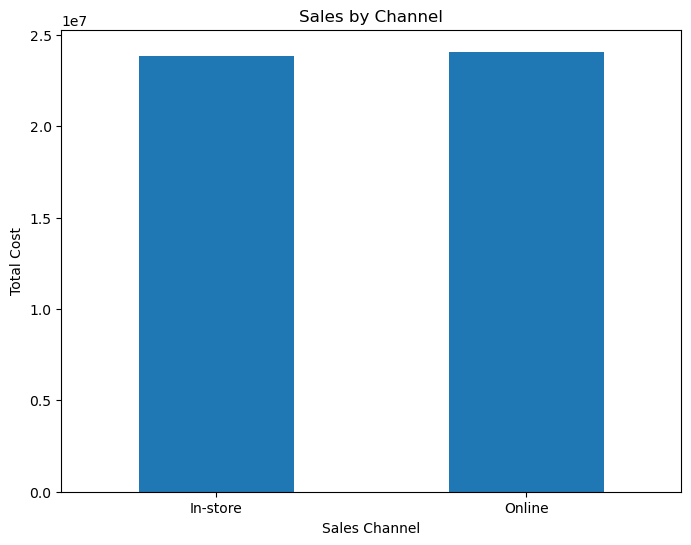

In [90]:
# Bar chart for sales by channel
sales_by_channel = df.groupby('SalesChannel')['TotalCost'].sum()

plt.figure(figsize=(8, 6))
sales_by_channel.plot(kind='bar')
plt.title('Sales by Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Total Cost')
plt.xticks(rotation=0)
plt.show()

### # Q-Q plot

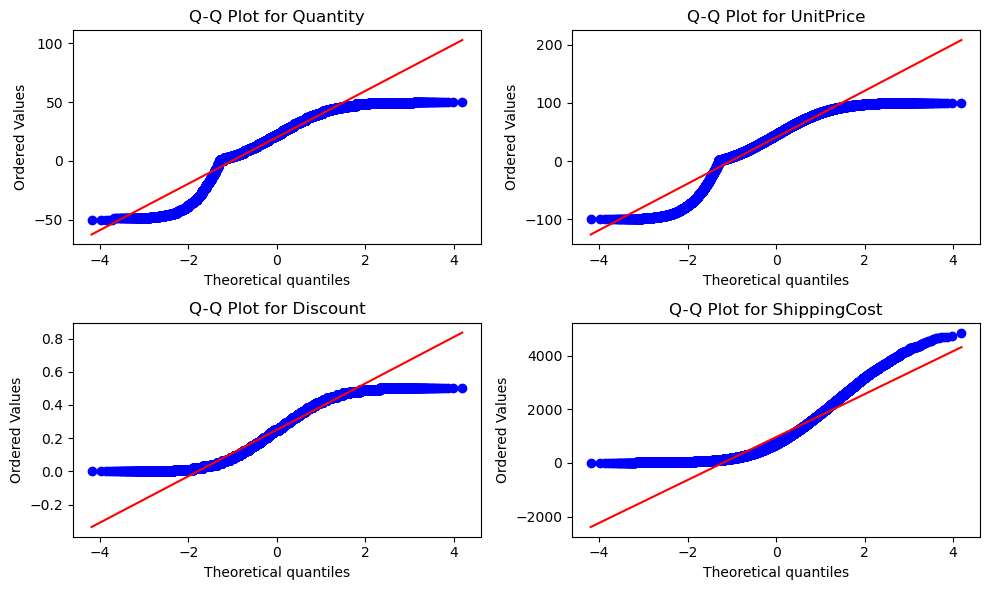

In [126]:
# Q-Q plot
plt.figure(figsize=(10, 6))

plt.subplot(221)
stats.probplot(df['Quantity'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Quantity")

plt.subplot(222)
stats.probplot(df['UnitPrice'], dist="norm", plot=plt)
plt.title("Q-Q Plot for UnitPrice")

plt.subplot(223)
stats.probplot(df['Discount'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Discount")

plt.subplot(224)
stats.probplot(df['TotalCost'], dist="norm", plot=plt)
plt.title("Q-Q Plot for ShippingCost")

plt.tight_layout()
plt.show()

### Skewness and kurtosis

In [127]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    print(f"{column}:")
    print(f"Skewness: {df[column].skew()}")
    print(f"Kurtosis: {df[column].kurtosis()}\n")

InvoiceNo:
Skewness: -0.0009739725433676315
Kurtosis: -1.2040184720134914

Quantity:
Skewness: -1.0215808980930146
Kurtosis: 1.1928680352420478

UnitPrice:
Skewness: -1.0254717708158625
Kurtosis: 1.1784094185724387

CustomerID:
Skewness: -0.08158280979840757
Kurtosis: -1.1217140611700258

Discount:
Skewness: -0.005379611473094142
Kurtosis: -1.1568939765429012

ShippingCost:
Skewness: 0.0028390218228336282
Kurtosis: -1.1085224829948186

TotalCost:
Skewness: 1.1821172244430467
Kurtosis: 0.9761339635026021

TotalSales:
Skewness: 0.9754317178373417
Kurtosis: 0.16557550257688902



### Sales of products

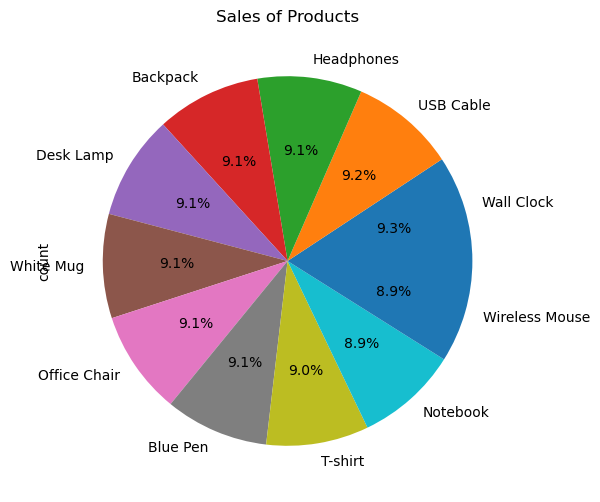

In [130]:
plt.figure(figsize=(10, 6))
df['Description'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales of Products')
plt.show()

### Cross match

In [135]:
# Cross match between Country and ReturnStatus
ct = pd.crosstab(df['Country'], df['ReturnStatus'])

# The ratio of unreturned products to returned products
ratio = ct['Not Returned'] / ct['Returned']

# Concatination
result = pd.concat([ct, ratio.rename('Ratio')], axis=1)

print(result)

                Not Returned  Returned     Ratio
Country                                         
Australia               3681       429  8.580420
Belgium                 3747       423  8.858156
France                  3820       410  9.317073
Germany                 3755       427  8.793911
Italy                   3650       398  9.170854
Netherlands             3779       394  9.591371
Norway                  3763       394  9.550761
Portugal                3758       405  9.279012
Spain                   3719       381  9.761155
Sweden                  3792       419  9.050119
United Kingdom          3769       411  9.170316
United States           3655       403  9.069479


## Step 7: Conclusion


- Summarize insights from your data analysis.
- Identify opportunities for improvement based on customer spending, product performance, and return rates.


### About the Data

#### Product Range
The company sells a diverse range of products including:
- **Apparel**: T-shirts, backpacks
- **Electronics**: Headphones, USB cables, wireless mice
- **Furniture**: Office chairs, desk lamps
- **Stationery**: Notebooks, blue pens
- **Accessories**: Wall clocks, white mugs

#### Global Reach
The business operates internationally, with customers from various countries including:
- United Kingdom
- Germany
- France
- Australia
- United States
- Spain
- Netherlands
- Belgium
- Norway
- Sweden
- Italy
- Portugal

#### Sales Channels
The company employs a multi-channel retail strategy:
- Online sales
- In-store sales

#### Payment Methods
Multiple payment options are available:
- Credit Card
- Bank Transfer
- PayPal

#### Shipping
The company utilizes various shipping providers:
- UPS
- FedEx
- DHL
- Royal Mail

#### Pricing and Discounts
- Unit prices vary widely across products
- Discounts are applied to many transactions, ranging from 0% to 50%

#### Returns
The dataset includes information on returned items, with a 'ReturnStatus' column indicating whether an item was returned or not.

#### Order Priorities
Orders are categorized by priority:
- Low
- Medium
- High

#### Inventory Management
There are instances of negative quantities in the dataset, which could indicate:
- Data entry errors
- Inventory adjustments
- Returns processing

#### Customer Segmentation
Each transaction is associated with a CustomerID, enabling customer-specific analysis and potential loyalty programs.

#### Seasonal Trends
The dataset covers transactions from January 1, 2020, to January 21, 2020, providing a snapshot of early-year sales patterns.

#### Product Categories
Products are categorized into:
- Apparel
- Electronics
- Furniture
- Stationery
- Accessories

#### Warehousing
Multiple warehouse locations are mentioned:
- London
- Rome
- Berlin
- Amsterdam
- Paris

#### Data Quality Considerations
- Some entries have negative quantities and prices, which require attention during analysis
- There are missing values in certain columns (e.g., CustomerID, ShippingCost)

#### Sales Performance Metrics
The dataset allows for calculation of key metrics such as:
- Revenue (Quantity * UnitPrice)
- Profit margins (considering discounts and shipping costs)
- Sales by category, country, or sales channel

#### Additional Features
- **ShippingCost**: Varies by transaction
- **SalesChannel**: Distinguishes between online and in-store purchases
- **ShipmentProvider**: Indicates the logistics partner for each transaction
- **WarehouseLocation**: Shows the origin of each shipment
- **OrderPriority**: May influence shipping or processing times

## Results

### Distribution of Shipping Costs by Shipment Provider

This boxplot reveals the distribution of shipping costs across different shipment providers:

- **FedEx** shows the widest range of shipping costs, with the highest median and the largest interquartile range. It also has some extreme high-cost outliers, reaching up to $50.
- **Royal Mail** has the second-highest median cost and a large interquartile range, indicating significant variability in pricing.
- **DHL** has the most compact box, suggesting more consistent pricing, but it also has some high outliers.
- **UPS** shows the lowest median cost and a relatively small interquartile range, potentially making it the most cost-effective option for many shipments.

These variations in shipping costs could be due to differences in service levels, shipping distances, or special handling requirements.

### Top 10 Products by Revenue

The horizontal bar chart displays the top 10 products by revenue:

1. White Mug (highest revenue, approximately $5.75 million)
2. T-shirt
3. Blue Pen
4. Wall Clock
5. Backpack
6. Headphones
7. USB Cable
8. Office Chair
9. Desk Lamp
10. Wireless Mouse (lowest among top 10, about $5.4 million)

Interestingly, the revenue spread among these top products is relatively small (between $5.4 and $5.75 million), indicating a balanced performance across various product categories. It's notable that both low-cost items (like mugs and pens) and higher-priced items (like office chairs and headphones) appear in the top 10, suggesting a diverse product mix contributes to overall revenue.

### Count of Returned vs Not Returned Products

This bar chart compares the count of returned and not returned products:

- **Not Returned**: Approximately 45,000 items
- **Returned**: About 5,000 items

The return rate is roughly 10%, which is relatively low and suggests good product quality and customer satisfaction. However, it's still a significant number of returns that could impact profitability and operations.

### Sales Counts by Channel

This bar chart illustrates the distribution of sales between online and in-store channels:

- **Online**: Approximately 25,000 sales
- **In-store**: Also around 25,000 sales

The perfect 50-50 split between online and in-store sales indicates a very balanced multi-channel strategy. This equilibrium suggests that the company has successfully integrated its online and physical retail operations, catering equally to customers who prefer shopping in person and those who prefer the convenience of online purchasing.

### Additional Insights and Recommendations

1. **Shipping Strategy**: Given the variability in shipping costs, especially with FedEx and Royal Mail, the company might consider negotiating better rates or reassessing its shipping provider mix to optimize costs.

2. **Product Focus**: While the top 10 products show similar revenue figures, analyzing profit margins for each could reveal which products are most beneficial to promote or expand.

3. **Returns Management**: Although the return rate is relatively low, implementing a strategy to further reduce returns could significantly impact profitability. Analyzing the reasons for returns could provide valuable insights.

4. **Channel Optimization**: The balanced sales across online and in-store channels suggest a strong omnichannel presence. The company could explore ways to create synergies between these channels, such as "click and collect" services or using stores as mini-distribution centers for online orders.

5. **Inventory Management**: With equal sales across channels, ensuring optimal inventory distribution between warehouses and stores is crucial to meet demand efficiently.

6. **Customer Behavior Analysis**: Combining data on product popularity, sales channels, and return rates could yield insights into customer preferences and behaviors, informing future marketing and product development strategies.